In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats


In [2]:
#reading data with pandas library
data = pd.read_excel("dataset.xlsx", sheet_name ="Sheet1")
data

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667
3,android-permission-handler-master,1,1,1,6,0.0,2.1,0.083333,1.000000,4.250000,18.757143,3.385714,3.019608,2.333333,8.833333,3.314286,1.666667
4,Android-WhatsApp-master,0,6,0,253,3.4,4.2,0.036145,2.843373,2.120482,46.416898,16.549861,7.336918,5.704301,10.913580,11.076696,0.903614
5,android-youtubeExtractor-master,4,18,7,100,3.8,3.1,0.200000,1.880000,6.720000,43.434783,2.920290,3.908163,5.020408,18.826090,8.260870,1.840000
6,androidtv-sample-inputs-master,15,3,0,155,3.0,1.0,0.241935,2.491935,8.120968,36.534765,11.452965,3.972868,4.281654,23.250000,5.811861,1.580645
7,BirthdayBuddy-master,1,0,0,69,1.0,0.2,0.000000,0.000000,0.000000,52.708333,1.708333,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,34,306,43,2000,10.1,1.7,0.500824,3.654036,7.975288,41.952099,5.579882,5.454865,4.075811,17.238180,9.152676,1.507414
9,epubator-master,0,12,8,134,0.0,3.0,0.255319,2.180851,6.063830,19.005579,2.112971,2.749027,3.050584,16.319150,3.418410,1.127660


In [3]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


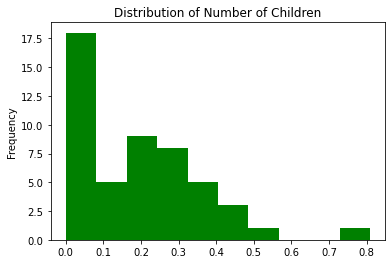

In [4]:
data["NOC"].plot(kind="hist",color ="green")
plt.title("Distribution of Number of Children")
plt.show()

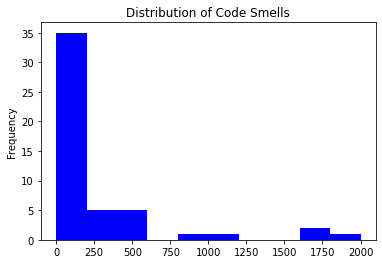

In [5]:
data["CS"].plot(kind="hist",color="blue")
plt.title("Distribution of Code Smells")
plt.show()

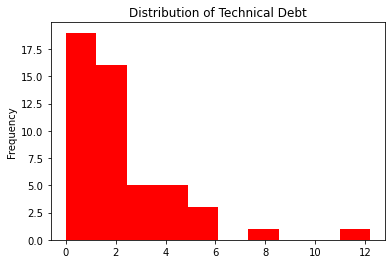

In [6]:
data["TD"].plot(kind="hist",color="red")
plt.title("Distribution of Technical Debt")
plt.show()

# Part1 (Statistical Correlation Analysis)

In [7]:
#Max-Min scaler for all data
data_copy = pd.read_excel("dataset.xlsx", sheet_name ="Sheet1")
try:data_copy.drop(["Name"], axis=1 , inplace=True)
except KeyError:pass
a = MinMaxScaler()
a.fit(data_copy)
data2 = a.transform(data_copy)
data_copy = pd.DataFrame(data2)
data_copy = data_copy.rename(columns={0:"NOB",1:"V",2:"SH",3:"CS",4:"CDR",5:"TD",6:"NOC",7:"CBO",8:"RFC",9:"LOC",10:"CLOC",11:"FanIn",12:"FanOut",13:"LCOM",14:"WMC",15:"DIT"})
data_copy

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


In [8]:
#Correlation matrix of all metrics
data_correlation = data_copy.corr(method="spearman")
data_correlation

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [9]:
#P values of Spearman Correlation Table
c,pval = stats.spearmanr(data_copy)
pval = pval.round(decimals=4)
dataframe = pd.DataFrame(pval)
dataframe = dataframe.rename(columns={0:"NOB",1:"V",2:"SH",3:"CS",4:"CDR",5:"TD",6:"NOC",7:"CBO",8:"RFC",9:"LOC",10:"CLOC",11:"FanIn",12:"FanOut",
13:"LCOM",14:"WMC",15:"DIT"},index = {0:"NOB",1:"V",2:"SH",3:"CS",4:"CDR",5:"TD",6:"NOC",7:"CBO",8:"RFC",9:"LOC",10:"CLOC",11:"FanIn",12:"FanOut",
13:"LCOM",14:"WMC",15:"DIT"})
dataframe


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


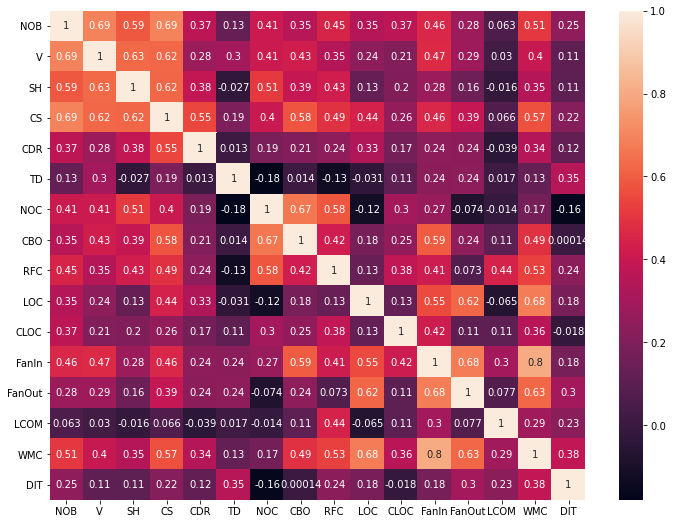

In [10]:
#Heatmap of the correlation matrix
fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(data_correlation,annot=True)
plt.show()


In [11]:
#Correlation between External Metrics & TD
data2 = pd.read_excel("dataset.xlsx", sheet_name ="Sheet1")
for a in["NOC","CBO","LCOM","FanIn","FanOut","RFC","DIT","WMC","LOC","CLOC"]:
    try:data2.drop([a], axis=1 , inplace=True)
    except KeyError:pass

data_correlation2 = data2.corr(method="spearman")
data_correlation2



,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [12]:
#Correlation between Internal Metrics & TD
data3 = pd.read_excel("dataset.xlsx", sheet_name ="Sheet1")
for b in["NOB","V","SH","CS"]:
    try:data3.drop([b], axis=1 , inplace=True)
    except KeyError:pass

data_correlation3 = data3.corr(method="spearman")
data_correlation3


,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

def linearRegression(x_train,y_train,x_test,y_test,name1,using):
    plt.figure(figsize=(7,7))
    LR = LinearRegression()
    LR.fit(x_train.values,y_train.values)
    prediction = LR.predict(x_test.values)
    plt.scatter(y_test.values,y_test.values,label="Original Values",color="red")
    plt.scatter(y_test.values,prediction,label="Predicted Values",color="blue")
    plt.title("Linear Regression | " + str(name1) + " & " + str(using))
    plt.legend()
    plt.show()
    print("Linear Regression | R-Squared Value = {}".format(r2_score(y_test,prediction)))
    print("Linear Regression | Root Mean Squared Error: {}".format(mean_squared_error(y_test,prediction,squared = False)))

def svrRegression(x_train,y_train,x_test,y_test,name1,using):
    plt.figure(figsize=(7,7))
    SR = SVR(kernel = "linear")
    SR.fit(x_train.values,y_train.values.ravel())
    prediction = SR.predict(x_test.values)
    plt.scatter(y_test.values,y_test.values,label="Original Values",color = "red")
    plt.scatter(y_test.values,prediction,label="Predicted Values",color="blue")
    plt.title("Linear SVR Regression | " + str(name1) + " & " + str(using))
    plt.legend()
    plt.show()
    print("Linear SVR Regression | R-Squared Value = {}".format(r2_score(y_test,prediction)))
    print("Linear SVR Regression | Root Mean Squared Error: {}".format(mean_squared_error(y_test,prediction,squared = False)))
    
def svrRegression2(x_train,y_train,x_test,y_test,name1,using):
    plt.figure(figsize=(7,7))
    SR = SVR(kernel = "rbf")
    SR.fit(x_train.values,y_train.values.ravel())
    prediction = SR.predict(x_test.values)
    plt.scatter(y_test.values,y_test.values,label="Original Values",color = "red")
    plt.scatter(y_test.values,prediction,label="Predicted Values",color="blue")
    plt.title("RBF SVR Regression | " + str(name1) + " & " + str(using))
    plt.legend()
    plt.show()
    print("RBF SVR Regression | R-Squared Value = {}".format(r2_score(y_test,prediction)))
    print("RBF SVR Regression | Root Mean Squared Error: {}".format(mean_squared_error(y_test,prediction , squared = False)))
    
def decisionTreeRegression(x_train,y_train,x_test,y_test,name1,using):
    plt.figure(figsize=(7,7))
    DT = DecisionTreeRegressor(random_state=53)
    DT.fit(x_train.values , y_train.values)
    prediction = DT.predict(x_test.values)
    plt.scatter(y_test.values,y_test.values,label="Original Values",color = "red")
    plt.scatter(y_test.values,prediction,label="Predicted Values",color="blue")
    plt.title("Decision Tree Regression | " + str(name1) + " & " + str(using))
    plt.legend()
    plt.show()
    print("Decision Tree Regression | R-Squared Value = {}".format(r2_score(y_test,prediction)))
    print("Decision Tree Regression | Root Mean Squared Error: {}".format(mean_squared_error(y_test,prediction, squared = False)))

    
def randomDecTreeRegression(x_train,y_train,x_test,y_test,name1,using):
    plt.figure(figsize=(7,7))
    RFR = RandomForestRegressor(random_state=53)
    RFR.fit(x_train.values , y_train.values.ravel())
    prediction = RFR.predict(x_test.values)
    plt.scatter(y_test.values,y_test.values,label="Original Values",color = "red")
    plt.scatter(y_test.values,prediction,label="Predicted Values",color="blue")
    plt.title("Random Forest Regression | " + str(name1) + " & " + str(using))
    plt.legend()
    plt.show()
    print("Random Forest Regression | R-Squared Value = {}".format(r2_score(y_test,prediction)))
    print("Random Forest Regression | Root Mean Squared Error: {}".format(mean_squared_error(y_test,prediction, squared = False)))

def mlpRegressor(x_train,y_train,x_test,y_test,name1,using):
    plt.figure(figsize=(7,7))
    MLPR = MLPRegressor(random_state=53)
    MLPR.fit(x_train.values , y_train.values.ravel())
    prediction = MLPR.predict(x_test.values)
    plt.scatter(y_test.values,y_test.values,label="Original Values",color = "red")
    plt.scatter(y_test.values,prediction,label="Predicted Values",color="blue")
    plt.title("Multi Layer Perceptron Regression | " + str(name1) + " & " + str(using))
    plt.legend()
    plt.show()
    print("Multi Layer Perceptron Regression | R-Squared Value = {}".format(r2_score(y_test,prediction)))
    print("Multi Layer Perceptron Regression | Root Mean Squared Error: {}".format(mean_squared_error(y_test,prediction,squared = False))) 

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [14]:
#split data into train and test data
x11 = data_copy.iloc[:,6:] 
y11 = data_copy.iloc[:,4:6]

x11_train,x11_test,y11_train,y11_test = train_test_split(x11,y11 ,test_size=0.3,random_state = 53)
y12_train = y11_train["CDR"] #y12 = CDR metrics
y12_test = y11_test["CDR"]
del y11_test["CDR"]
del y11_train["CDR"]

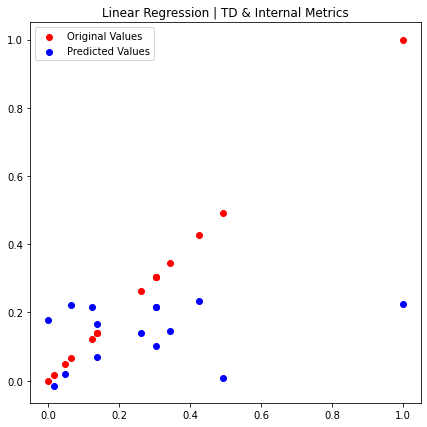

Linear Regression | R-Squared Value = -0.172967530469208
Linear Regression | Root Mean Squared Error: 0.26506407767604295


In [15]:
linearRegression(x11_train,y11_train,x11_test,y11_test,"TD","Internal Metrics")



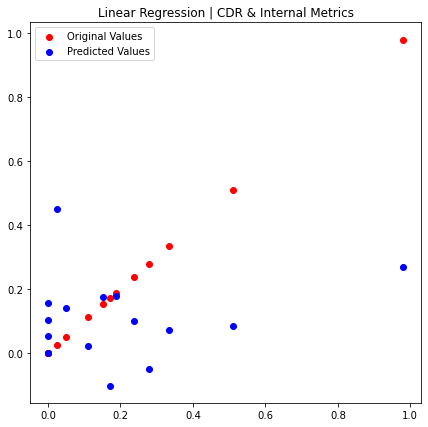

Linear Regression | R-Squared Value = -0.253539369006031
Linear Regression | Root Mean Squared Error: 0.2822820349754405


In [16]:
linearRegression(x11_train,y12_train,x11_test,y12_test,"CDR","Internal Metrics")

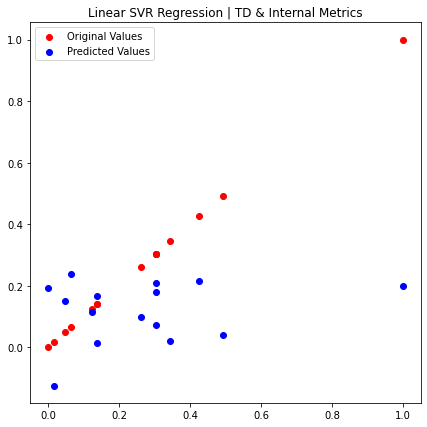

Linear SVR Regression | R-Squared Value = -0.3526354995047598
Linear SVR Regression | Root Mean Squared Error: 0.2846415332813681


In [17]:
svrRegression(x11_train,y11_train,x11_test,y11_test,"TD","Internal Metrics")


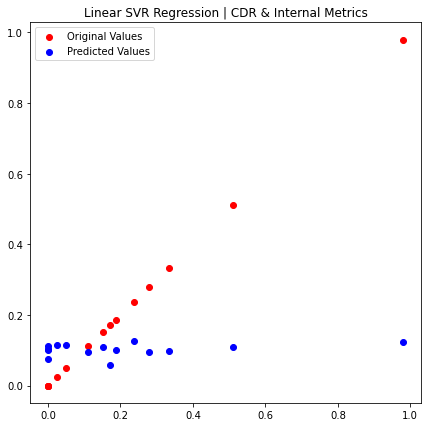

Linear SVR Regression | R-Squared Value = -0.12212300389682662
Linear SVR Regression | Root Mean Squared Error: 0.2670757664434763


In [18]:
svrRegression(x11_train,y12_train,x11_test,y12_test,"CDR","Internal Metrics")

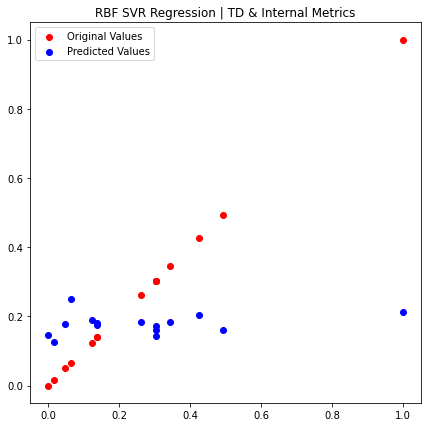

RBF SVR Regression | R-Squared Value = -0.07658669531666251
RBF SVR Regression | Root Mean Squared Error: 0.25394074173641473


In [19]:
svrRegression2(x11_train,y11_train,x11_test,y11_test,"TD","Internal Metrics")

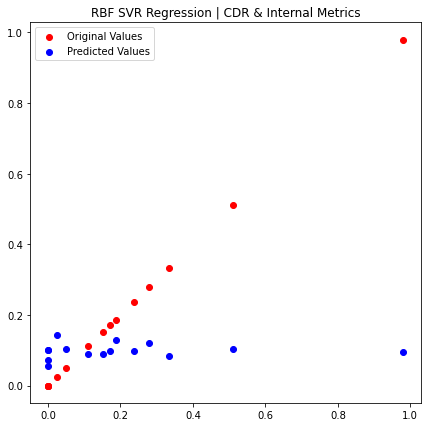

RBF SVR Regression | R-Squared Value = -0.16455641994479597
RBF SVR Regression | Root Mean Squared Error: 0.2720786834980814


In [20]:
svrRegression2(x11_train,y12_train,x11_test,y12_test,"CDR","Internal Metrics")

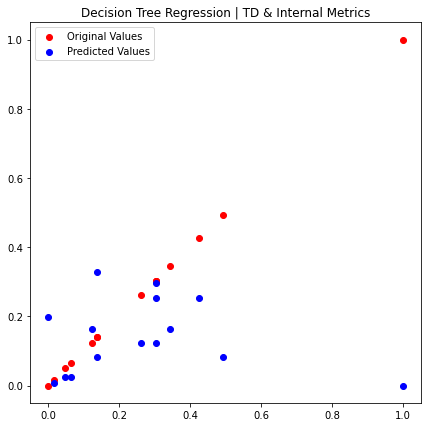

Decision Tree Regression | R-Squared Value = -0.5204592360688753
Decision Tree Regression | Root Mean Squared Error: 0.30178334647732696


In [21]:
decisionTreeRegression(x11_train,y11_train,x11_test,y11_test,"TD","Internal Metrics")


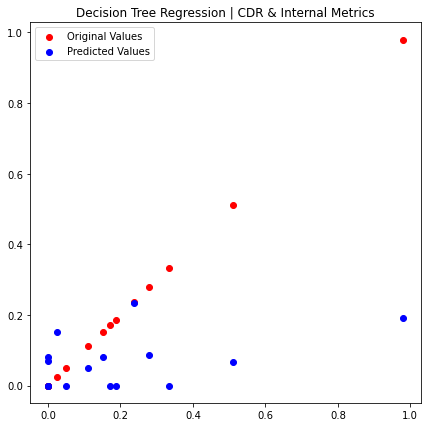

Decision Tree Regression | R-Squared Value = -0.12150757783825572
Decision Tree Regression | Root Mean Squared Error: 0.26700251782083956


In [22]:
decisionTreeRegression(x11_train,y12_train,x11_test,y12_test,"CDR","Internal Metrics")

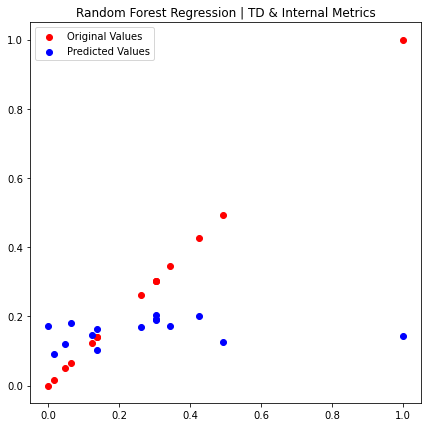

Random Forest Regression | R-Squared Value = -0.16969786733401793
Random Forest Regression | Root Mean Squared Error: 0.26469438498303655


In [23]:
randomDecTreeRegression(x11_train,y11_train,x11_test,y11_test,"TD","Internal Metrics")


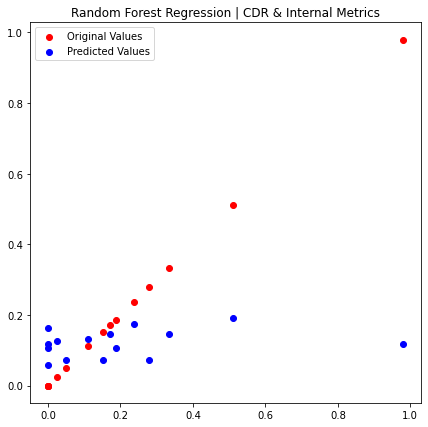

Random Forest Regression | R-Squared Value = -0.05101676969007363
Random Forest Regression | Root Mean Squared Error: 0.25847531504491733


In [24]:
randomDecTreeRegression(x11_train,y12_train,x11_test,y12_test,"CDR","Internal Metrics")

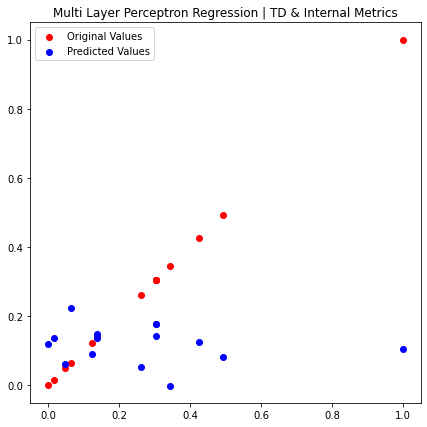

Multi Layer Perceptron Regression | R-Squared Value = -0.4871772319255996
Multi Layer Perceptron Regression | Root Mean Squared Error: 0.2984621365383263


In [25]:
mlpRegressor(x11_train,y11_train,x11_test,y11_test,"TD","Internal Metrics")


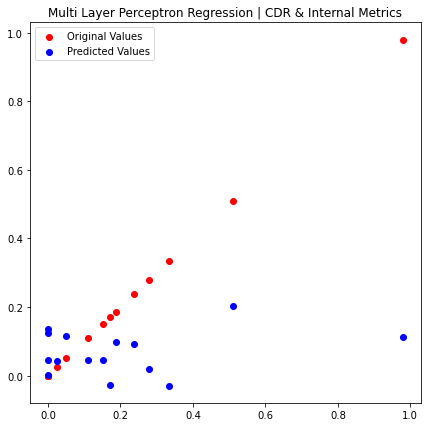

Multi Layer Perceptron Regression | R-Squared Value = -0.22435327148884188
Multi Layer Perceptron Regression | Root Mean Squared Error: 0.2789765014141509


In [26]:
mlpRegressor(x11_train,y12_train,x11_test,y12_test,"CDR","Internal Metrics")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [27]:
#split data into train and test data

x21 = data_copy.iloc[:,0:4]
y21 = data_copy.iloc[:,4:6]
x21_train,x21_test,y21_train,y21_test = train_test_split(x21,y21 ,test_size=0.3,random_state = 53)
y22_train = y21_train["CDR"] #y22 = CDR metrics
y22_test = y21_test["CDR"]
del y21_test["CDR"]
del y21_train["CDR"]


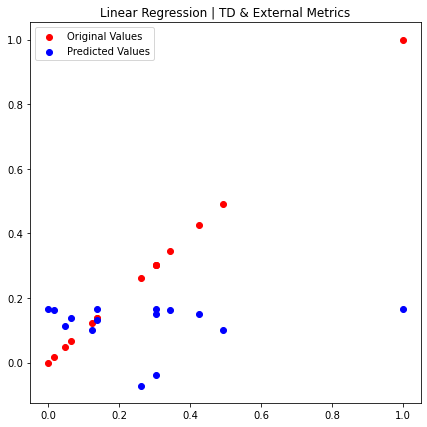

Linear Regression | R-Squared Value = -0.4331628534217624
Linear Regression | Root Mean Squared Error: 0.2929919249634493


In [28]:
linearRegression(x21_train,y21_train,x21_test,y21_test,"TD","External Metrics")


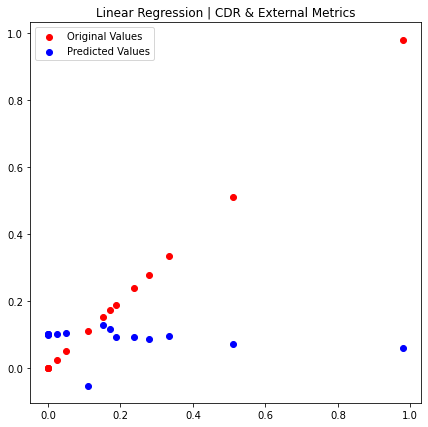

Linear Regression | R-Squared Value = -0.2987740793386182
Linear Regression | Root Mean Squared Error: 0.2873300555429503


In [29]:
linearRegression(x21_train,y22_train,x21_test,y22_test,"CDR","External Metrics")

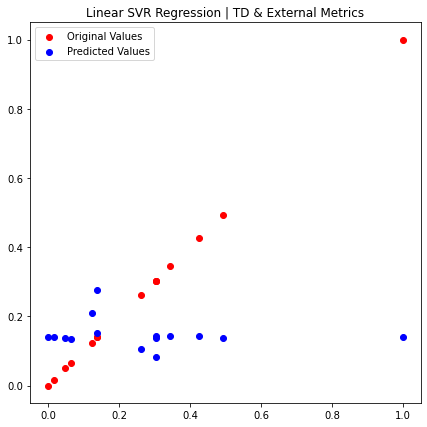

Linear SVR Regression | R-Squared Value = -0.3170558678590276
Linear SVR Regression | Root Mean Squared Error: 0.28087299055485854


In [30]:
svrRegression(x21_train,y21_train,x21_test,y21_test,"TD","External Metrics")


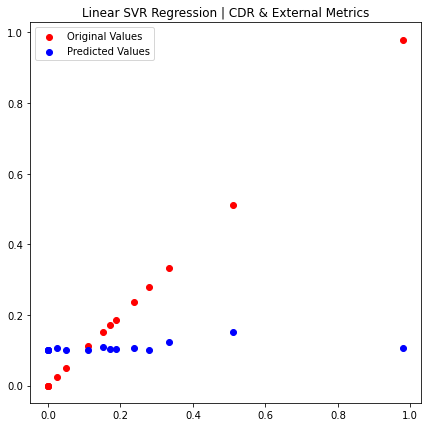

Linear SVR Regression | R-Squared Value = -0.10105796501066222
Linear SVR Regression | Root Mean Squared Error: 0.2645570517029422


In [31]:
svrRegression(x21_train,y22_train,x21_test,y22_test,"CDR","External Metrics")

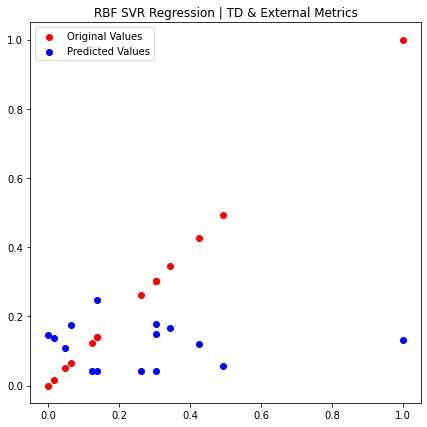

RBF SVR Regression | R-Squared Value = -0.45281551449179935
RBF SVR Regression | Root Mean Squared Error: 0.2949939533353097


In [32]:
svrRegression2(x21_train,y21_train,x21_test,y21_test,"TD","External Metrics")


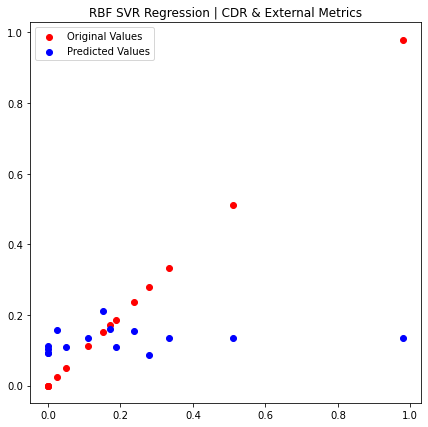

RBF SVR Regression | R-Squared Value = -0.05742000726843233
RBF SVR Regression | Root Mean Squared Error: 0.2592614897703499


In [33]:
svrRegression2(x21_train,y22_train,x21_test,y22_test,"CDR","External Metrics")

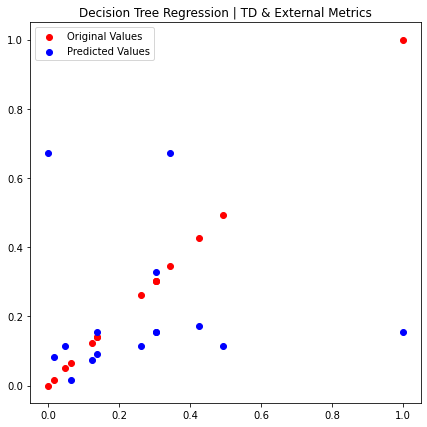

Decision Tree Regression | R-Squared Value = -0.7371656181142008
Decision Tree Regression | Root Mean Squared Error: 0.32257335573307827


In [34]:
decisionTreeRegression(x21_train,y21_train,x21_test,y21_test,"TD","External Metrics")


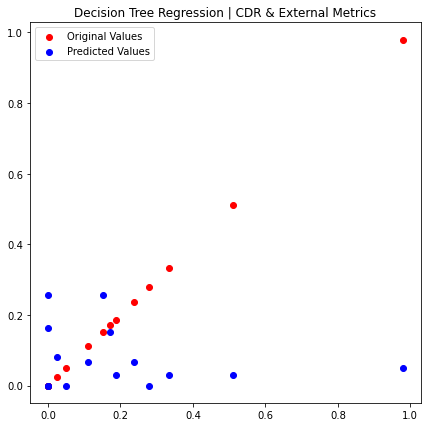

Decision Tree Regression | R-Squared Value = -0.49827719657436775
Decision Tree Regression | Root Mean Squared Error: 0.3086102422213462


In [35]:
decisionTreeRegression(x21_train,y22_train,x21_test,y22_test,"CDR","External Metrics")

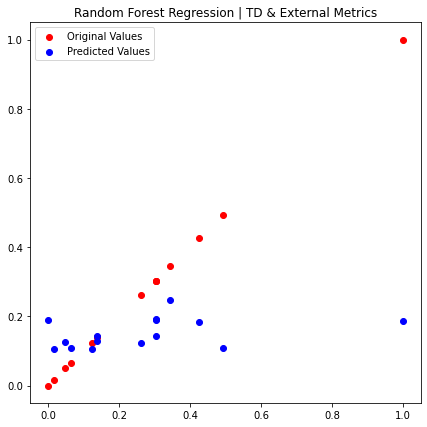

Random Forest Regression | R-Squared Value = -0.11428872623308783
Random Forest Regression | Root Mean Squared Error: 0.2583489780064541


In [36]:
randomDecTreeRegression(x21_train,y21_train,x21_test,y21_test,"TD","External Metrics")


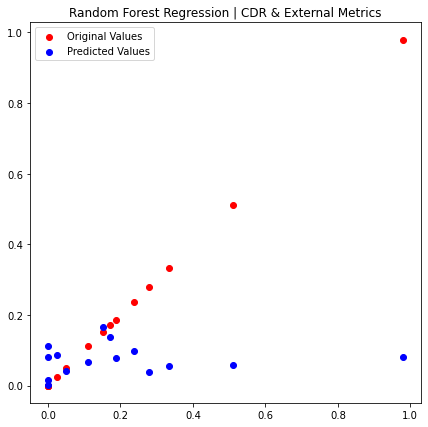

Random Forest Regression | R-Squared Value = -0.26333860652667807
Random Forest Regression | Root Mean Squared Error: 0.28338322249338543


In [37]:
randomDecTreeRegression(x21_train,y22_train,x21_test,y22_test,"CDR","External Metrics")

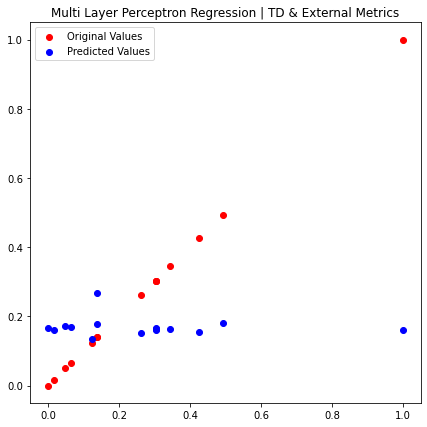

Multi Layer Perceptron Regression | R-Squared Value = -0.19051694994963908
Multi Layer Perceptron Regression | Root Mean Squared Error: 0.2670396014132049


In [38]:
mlpRegressor(x21_train,y21_train,x21_test,y21_test,"TD","External Metrics")


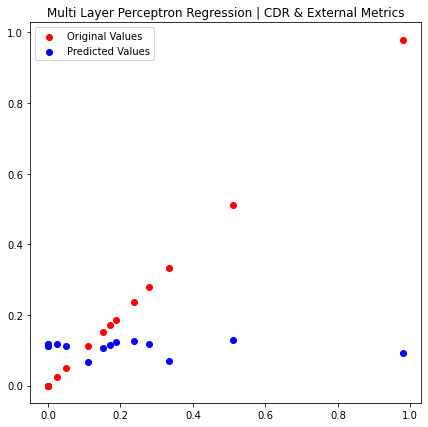

Multi Layer Perceptron Regression | R-Squared Value = -0.17331247765522573
Multi Layer Perceptron Regression | Root Mean Squared Error: 0.2730996195799929


In [39]:
mlpRegressor(x21_train,y22_train,x21_test,y22_test,"CDR","External Metrics")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [40]:
#split data into train and test data 
x31 = data_copy.iloc[:,6:]
x31.insert(0,"CS",data_copy["CS"])
x31.insert(0,"SH",data_copy["SH"])
x31.insert(0,"V",data_copy["V"])
x31.insert(0,"NOB",data_copy["NOB"])
y31 = data_copy.iloc[:,4:6]
x31_train,x31_test,y31_train,y31_test = train_test_split(x31,y31 ,test_size=0.3,random_state = 53)
y32_train = y31_train["CDR"] #y32 = CDR metrics
y32_test = y31_test["CDR"]
del y31_test["CDR"]
del y31_train["CDR"]

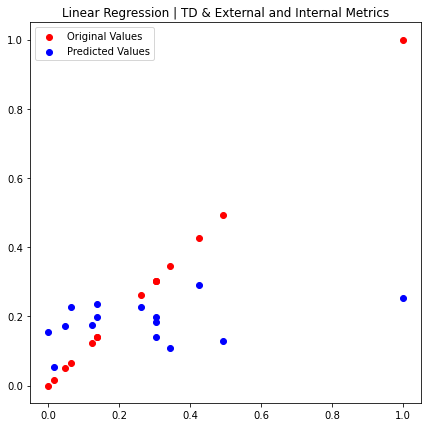

Linear Regression | R-Squared Value = -0.003633279100097475
Linear Regression | Root Mean Squared Error: 0.2451858519572479


In [41]:
linearRegression(x31_train,y31_train,x31_test,y31_test,"TD","External and Internal Metrics")


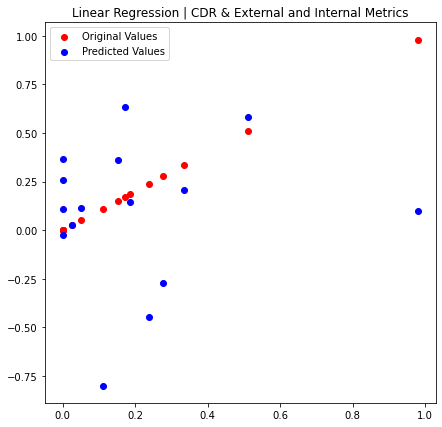

Linear Regression | R-Squared Value = -2.0091415912958004
Linear Regression | Root Mean Squared Error: 0.43735647669844646


In [42]:
linearRegression(x31_train,y32_train,x31_test,y32_test,"CDR","External and Internal Metrics")

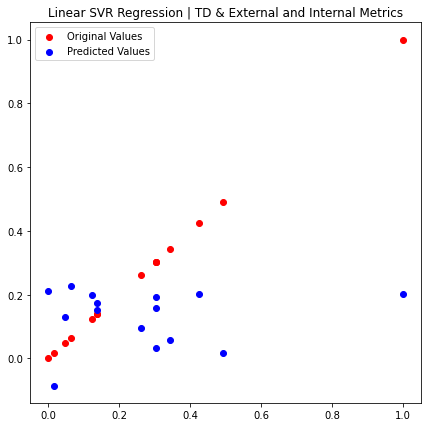

Linear SVR Regression | R-Squared Value = -0.36281172246930304
Linear SVR Regression | Root Mean Squared Error: 0.2857102425477753


In [43]:
svrRegression(x31_train,y31_train,x31_test,y31_test,"TD","External and Internal Metrics")


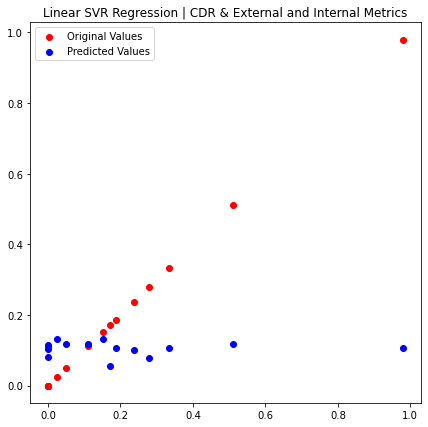

Linear SVR Regression | R-Squared Value = -0.1605709781449498
Linear SVR Regression | Root Mean Squared Error: 0.2716127193456499


In [44]:
svrRegression(x31_train,y32_train,x31_test,y32_test,"CDR","External and Internal Metrics")

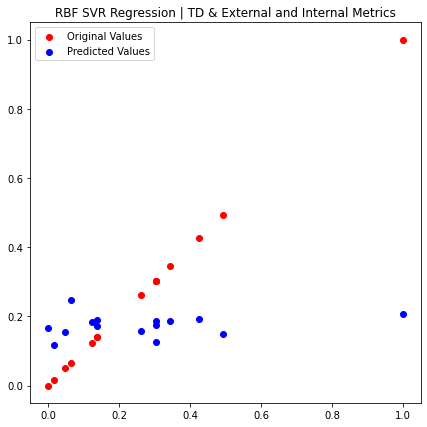

RBF SVR Regression | R-Squared Value = -0.09720921648004222
RBF SVR Regression | Root Mean Squared Error: 0.2563613813817413


In [45]:
svrRegression2(x31_train,y31_train,x31_test,y31_test,"TD","External and Internal Metrics")


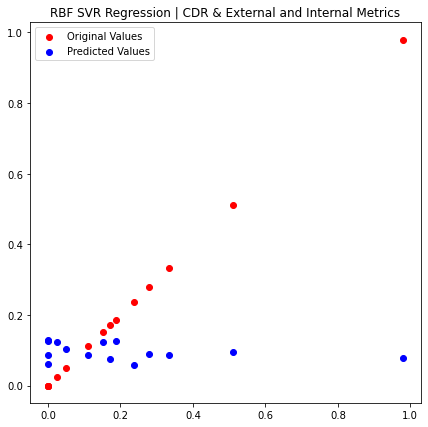

RBF SVR Regression | R-Squared Value = -0.23945919966775864
RBF SVR Regression | Root Mean Squared Error: 0.2806922153718834


In [46]:
svrRegression2(x31_train,y32_train,x31_test,y32_test,"CDR","External and Internal Metrics")

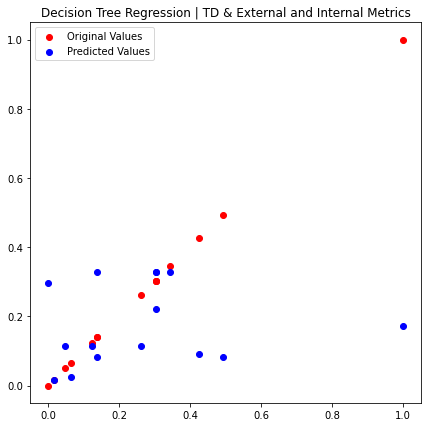

Decision Tree Regression | R-Squared Value = -0.2556706581453083
Decision Tree Regression | Root Mean Squared Error: 0.2742494419820825


In [47]:
decisionTreeRegression(x31_train,y31_train,x31_test,y31_test,"TD","External and Internal Metrics")


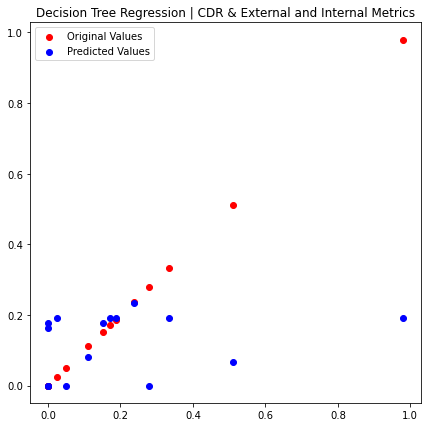

Decision Tree Regression | R-Squared Value = -0.05417378556625985
Decision Tree Regression | Root Mean Squared Error: 0.25886322456148736


In [48]:
decisionTreeRegression(x31_train,y32_train,x31_test,y32_test,"CDR","External and Internal Metrics")

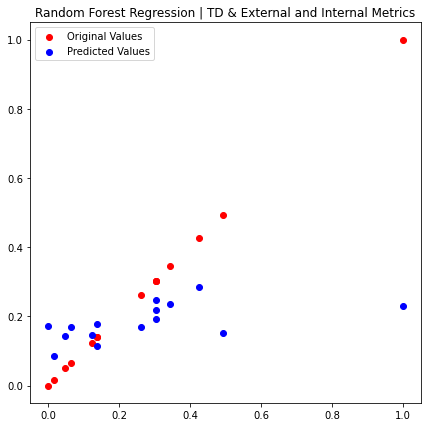

Random Forest Regression | R-Squared Value = 0.07627455457291843
Random Forest Regression | Root Mean Squared Error: 0.23522275547294955


In [49]:
randomDecTreeRegression(x31_train,y31_train,x31_test,y31_test,"TD","External and Internal Metrics")


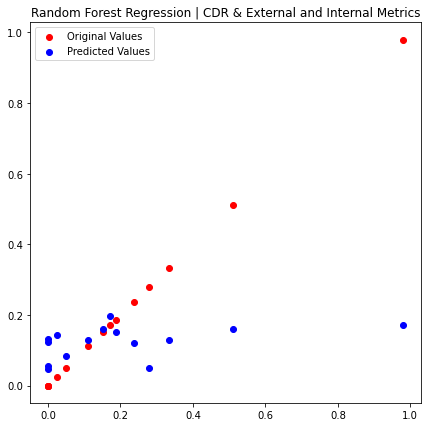

Random Forest Regression | R-Squared Value = 0.01479470371704672
Random Forest Regression | Root Mean Squared Error: 0.2502520360002964


In [50]:
randomDecTreeRegression(x31_train,y32_train,x31_test,y32_test,"CDR","External and Internal Metrics")

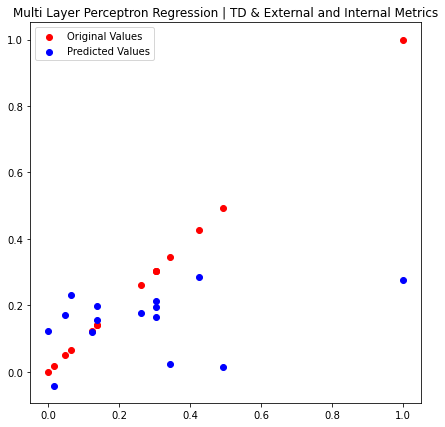

Multi Layer Perceptron Regression | R-Squared Value = -0.09356621979107316
Multi Layer Perceptron Regression | Root Mean Squared Error: 0.25593543701691623


In [51]:
mlpRegressor(x31_train,y31_train,x31_test,y31_test,"TD","External and Internal Metrics")


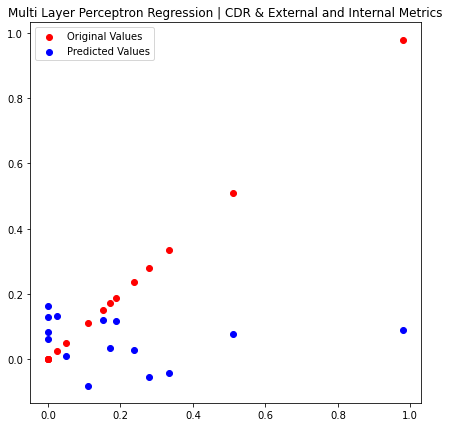

Multi Layer Perceptron Regression | R-Squared Value = -0.47729270505957055
Multi Layer Perceptron Regression | Root Mean Squared Error: 0.30644146309720954


In [52]:
mlpRegressor(x31_train,y32_train,x31_test,y32_test,"CDR","External and Internal Metrics")